# Loan Eligibility Predictor

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [155]:
df_train = pd.read_csv('Dataset/train.csv')
df_test = pd.read_csv('Dataset/test.csv')

In [156]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [157]:
df_train.shape

(614, 13)

In [158]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [159]:
df_test.shape

(367, 12)

## EDA

In [160]:
target_v = df_train['Loan_Status'] # TARGET VARIABLE

df_train.drop(columns='Loan_Status', inplace=True)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


For Data Cleaning, combine train & test datas. Before making model split it into train and test dataset.

In [161]:
# Adding source column to differentiate
df_train['source'] = 'train'
df_test['source'] = 'test'

In [162]:
# Concatenate the datasets
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,train


In [163]:
df.shape

(981, 13)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  source             981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [165]:
ID = df['Loan_ID']

df.drop(columns='Loan_ID', inplace=True)

In [166]:
df.isna().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
source                0
dtype: int64

`['Gender', 'Married','Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] has null values`

In [167]:
df.isna().sum()/len(df)*100

Gender               2.446483
Married              0.305810
Dependents           2.548420
Education            0.000000
Self_Employed        5.606524
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           2.752294
Loan_Amount_Term     2.038736
Credit_History       8.053007
Property_Area        0.000000
source               0.000000
dtype: float64

In [168]:
df['Gender'].value_counts(dropna=False)

Gender
Male      775
Female    182
NaN        24
Name: count, dtype: int64

In [169]:
df['Married'].value_counts(dropna=False)

Married
Yes    631
No     347
NaN      3
Name: count, dtype: int64

In [170]:
df['Dependents'].value_counts(dropna=False)

Dependents
0      545
1      160
2      160
3+      91
NaN     25
Name: count, dtype: int64

In [171]:
df['Self_Employed'].value_counts(dropna=False)

Self_Employed
No     807
Yes    119
NaN     55
Name: count, dtype: int64

In [172]:
df['LoanAmount'].value_counts(dropna=False)

LoanAmount
120.0    29
NaN      27
110.0    27
100.0    24
187.0    21
         ..
218.0     1
62.0      1
53.0      1
242.0     1
197.0     1
Name: count, Length: 233, dtype: int64

In [173]:
df['Loan_Amount_Term'].value_counts(dropna=False)

Loan_Amount_Term
360.0    823
180.0     66
480.0     23
NaN       20
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: count, dtype: int64

Need to reduce categories in Loan amt term

In [174]:
def categorize_loan_term(term):
    if pd.isna(term):  # Check for NaN
        return
    elif term <= 100: return 'Short-term'
    elif term <= 300: return 'Medium-term'
    else: return 'Long-term'


df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(categorize_loan_term)
df['Loan_Amount_Term'].value_counts(dropna=False)

Loan_Amount_Term
Long-term      847
Medium-term     98
None            20
Short-term      16
Name: count, dtype: int64

In [175]:
df['Credit_History'].value_counts(dropna=False)

Credit_History
1.0    754
0.0    148
NaN     79
Name: count, dtype: int64

In [176]:
# Imputing missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [177]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
source               0
dtype: int64

<Axes: xlabel='LoanAmount', ylabel='Count'>

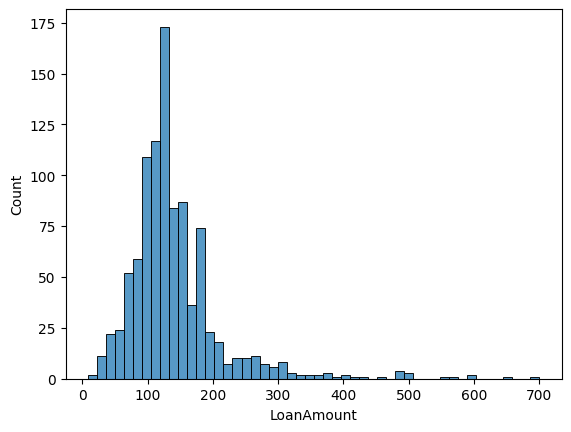

In [178]:
sns.histplot(df['LoanAmount'], bins=50)

In [179]:
df['LoanAmount'] = np.cbrt(df['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

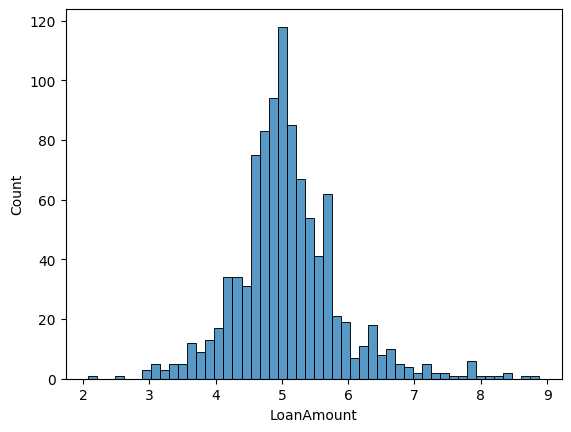

In [180]:
sns.histplot(df['LoanAmount'], bins=50)

In [181]:
# Perform the Shapiro-Wilk test
shapiro_test = stats.shapiro(df['LoanAmount'])

In [182]:
print(f'Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

Statistic: 0.9448639176533082, p-value: 1.1826960819387838e-18


Not normal

#### ApplicantIncome

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

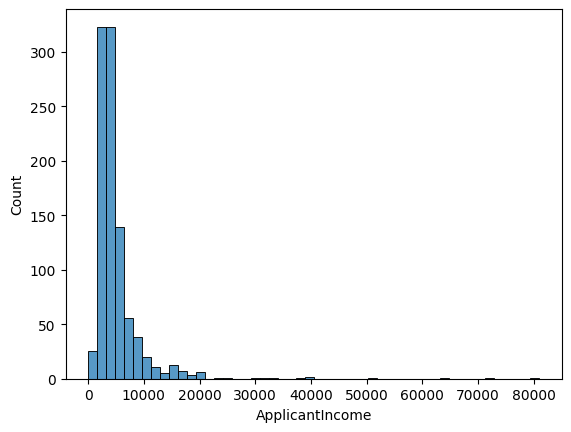

In [183]:
sns.histplot(df['ApplicantIncome'], bins=50)

In [184]:
df['ApplicantIncome'].quantile([.9,.95,.97,.98,.99])

0.90     8750.0
0.95    12500.0
0.97    15903.6
0.98    18232.2
0.99    25671.0
Name: ApplicantIncome, dtype: float64

In [185]:
# upper caping
upper_cap = df['ApplicantIncome'].quantile(.98)
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper_cap, upper_cap, df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

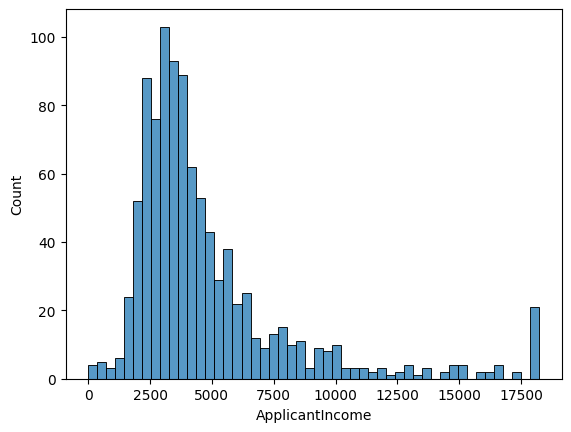

In [186]:
sns.histplot(df['ApplicantIncome'], bins=50)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

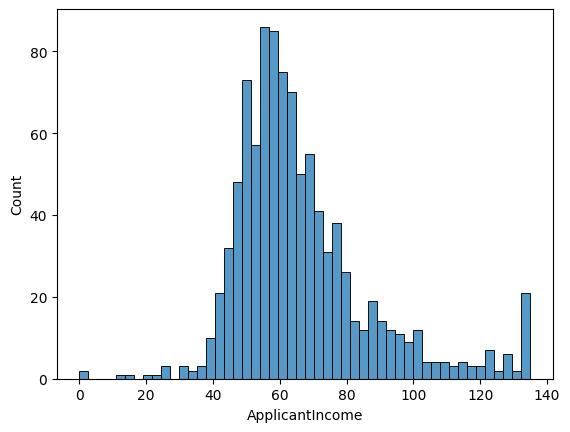

In [187]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
sns.histplot(df['ApplicantIncome'], bins=50)

#### CoapplicantIncome

In [188]:
df['CoapplicantIncome'].describe()

count      981.000000
mean      1601.916330
std       2718.772806
min          0.000000
25%          0.000000
50%       1110.000000
75%       2365.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [189]:
df['CoapplicantIncome'].quantile([.9,.95,.97,.98,.99])

0.90     3796.0
0.95     4700.0
0.97     5625.0
0.98     7183.6
0.99    11034.4
Name: CoapplicantIncome, dtype: float64

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

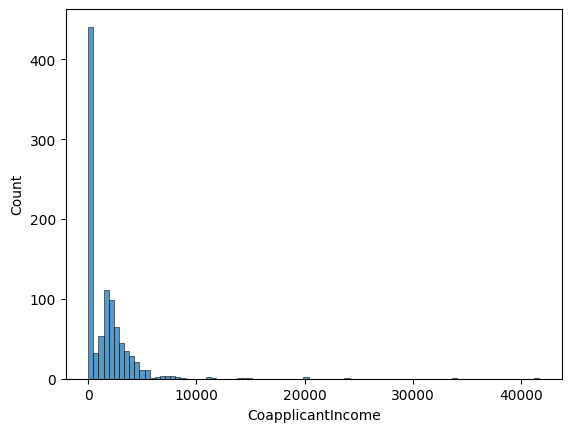

In [190]:
sns.histplot(df['CoapplicantIncome'])

<Axes: >

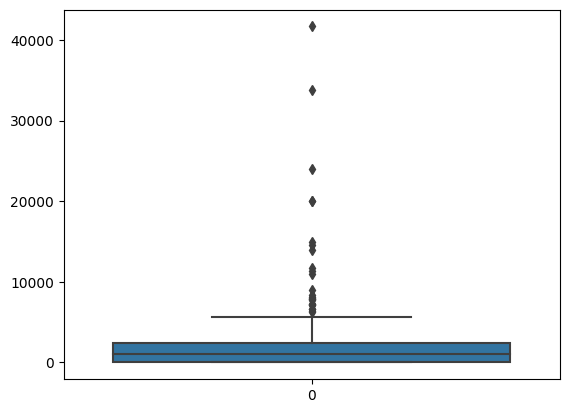

In [191]:
sns.boxplot(df['CoapplicantIncome'])

In [192]:
# capping the extreme values
upper_cap = df['CoapplicantIncome'].quantile(0.99)
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > upper_cap, upper_cap, df['CoapplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

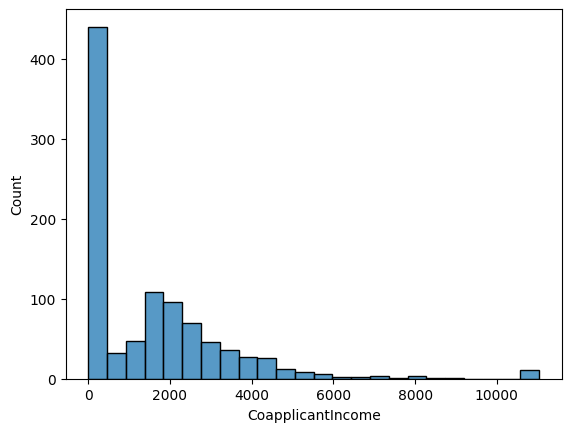

In [193]:
sns.histplot(df['CoapplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

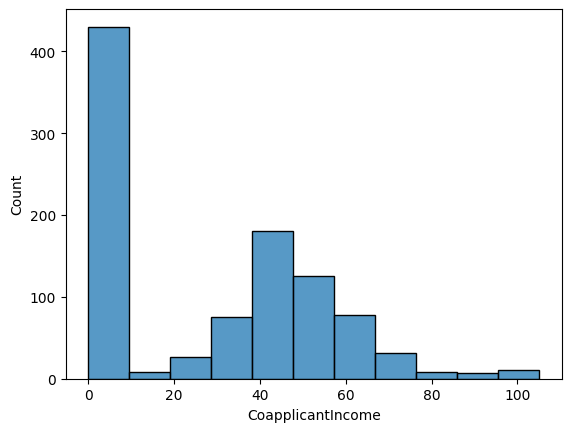

In [194]:
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
sns.histplot(df['CoapplicantIncome'])

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    object 
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  source             981 non-null    object 
dtypes: float64(4), object(8)
memory usage: 92.1+ KB


In [196]:
df['Credit_History'] = df['Credit_History'].astype(int)


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    object 
 9   Credit_History     981 non-null    int64  
 10  Property_Area      981 non-null    object 
 11  source             981 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 92.1+ KB


In [198]:
# Modeling

In [199]:
df['Gender'].value_counts()

Gender
Male      799
Female    182
Name: count, dtype: int64

In [200]:
df['Married'].value_counts()

Married
Yes    634
No     347
Name: count, dtype: int64

In [201]:
df['Self_Employed'].value_counts()

Self_Employed
No     862
Yes    119
Name: count, dtype: int64

In [202]:
df['Education'].value_counts()

Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64

In [203]:
binary_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

In [204]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source
0,1,0,0,1,0,76.478755,0.000000,5.013298,Long-term,1,Urban,train
1,1,1,1,1,0,67.697858,38.832976,5.039684,Long-term,1,Rural,train
2,1,1,0,1,1,54.772256,0.000000,4.041240,Long-term,1,Urban,train
3,1,1,0,0,0,50.823223,48.559242,4.932424,Long-term,1,Urban,train
4,1,0,0,1,0,77.459667,0.000000,5.204828,Long-term,1,Urban,train


In [205]:
# Create dummies for the remaining categorical variables
categorical_columns = ['Dependents', 'Loan_Amount_Term', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype='int')

In [206]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,source,Dependents_1,Dependents_2,Dependents_3+,Loan_Amount_Term_Medium-term,Loan_Amount_Term_Short-term,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,76.478755,0.000000,5.013298,1,train,0,0,0,0,0,0,1
1,1,1,1,0,67.697858,38.832976,5.039684,1,train,1,0,0,0,0,0,0
2,1,1,1,1,54.772256,0.000000,4.041240,1,train,0,0,0,0,0,0,1
3,1,1,0,0,50.823223,48.559242,4.932424,1,train,0,0,0,0,0,0,1
4,1,0,1,0,77.459667,0.000000,5.204828,1,train,0,0,0,0,0,0,1


In [207]:
source_col = df['source']
df.drop(columns='source', inplace=True)

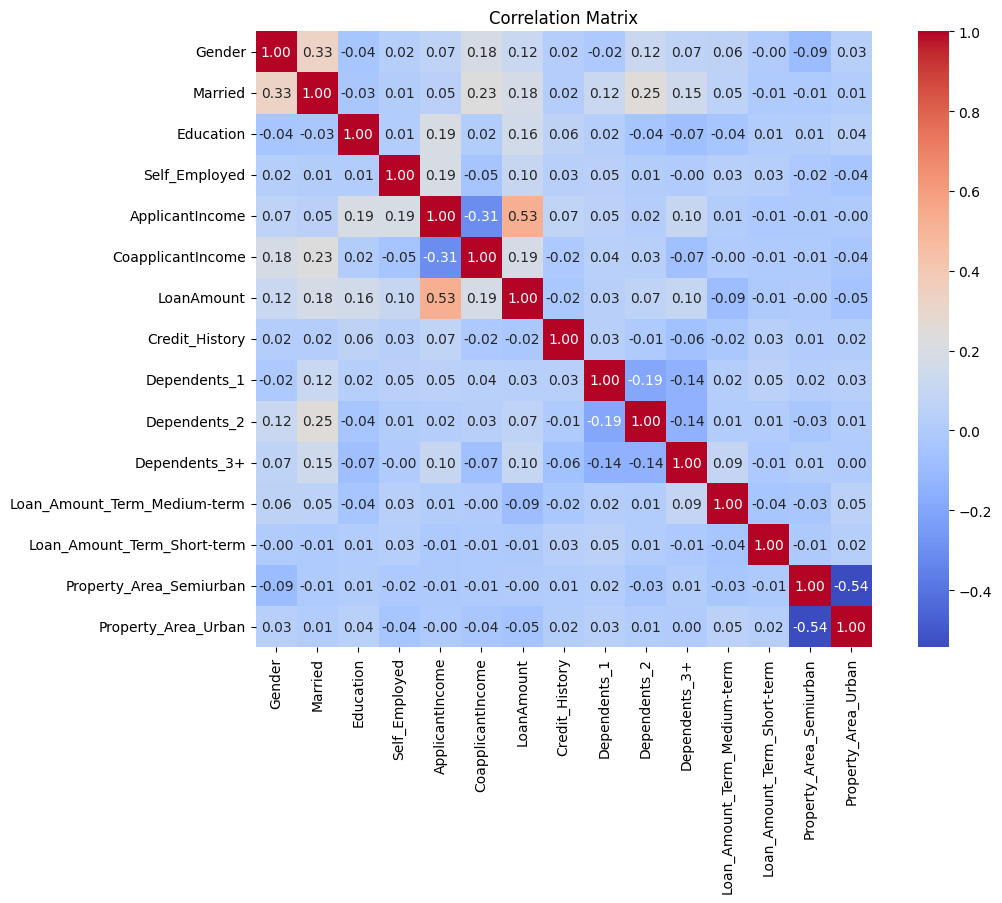

In [208]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

We may keep Property_Area_Urban and drop Property_Area_Semiurban (or vice versa)

In [209]:
# df.drop(columns='Property_Area_Semiurban', inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        981 non-null    int64  
 1   Married                       981 non-null    int64  
 2   Education                     981 non-null    int64  
 3   Self_Employed                 981 non-null    int64  
 4   ApplicantIncome               981 non-null    float64
 5   CoapplicantIncome             981 non-null    float64
 6   LoanAmount                    981 non-null    float64
 7   Credit_History                981 non-null    int64  
 8   Dependents_1                  981 non-null    int64  
 9   Dependents_2                  981 non-null    int64  
 10  Dependents_3+                 981 non-null    int64  
 11  Loan_Amount_Term_Medium-term  981 non-null    int64  
 12  Loan_Amount_Term_Short-term   981 non-null    int64  
 13  Prope

### Model Creation

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [212]:
target_v.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [213]:
binary_mappings = {
    'Y': 1,
    'N': 0
}
target_v = target_v.map(binary_mappings)


In [214]:
df['source'] = source_col

In [215]:
X = df.loc[df['source'] == 'train'].drop(columns='source')
Y = target_v
X_to_test = df.loc[df['source'] == 'test'].drop(columns='source')

print(f"X -> {X.shape}")
print(f"Y - > {Y.shape}")
print(f"X_to_test -> {X_to_test.shape}")

X -> (614, 15)
Y - > (614,)
X_to_test -> (367, 15)


In [216]:
# Splitting Dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [217]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [218]:
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [219]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [220]:
# Model Evaluation
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [221]:
# Accuracy
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

print(f"Train Data Accuracy: {train_accuracy}, \nTest Data Accuracy: {test_accuracy}")

Train Data Accuracy: 0.8018648018648019, 
Test Data Accuracy: 0.827027027027027


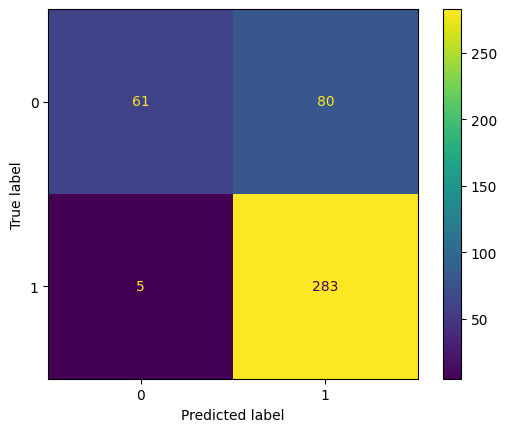

In [222]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [0, 1],)
cm_train_display.plot()

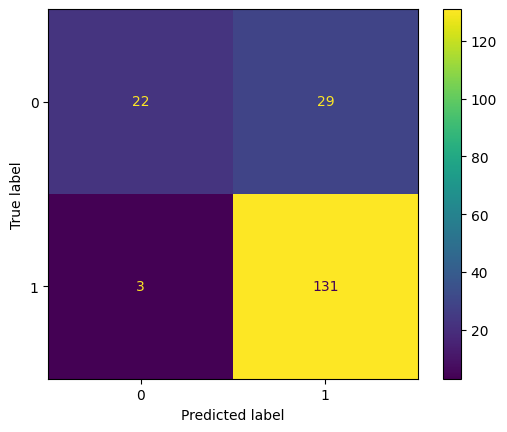

In [223]:
# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
cm_test_display.plot()

In [224]:
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429



- Precission: When the model predicts class 0, it's correct 92% of the time. When predicting class 1, it's correct 78% of the time.
- Recall: The model correctly identifies 98% of the actual class 1 instances, but only 43% of the actual class 0 instances.
- f1=score: The F1-score combines both precision and recall, giving a single number to summarize performance. For class 0, the  F1-score is lower due to low recall, while for class 1, the F1-score is higher due to high recall.